# Applied Statistics - Problems
***

This notebook presents a series of four applied statistics problems designed to consolidate and demonstrate key concepts covered in the module Applied Statistics in ATU tought by the lecturer Ian McLoughlin. The assessment combines analytical reasoning, simulation-based methods, and formal hypothesis testing to explore how statistical inference behaves under different experimental designs and assumptions. Throughout, Python is used as a computational tool to implement simulations, perform statistical tests, and visualise results, with an emphasis on reproducibility and clear interpretation.

The problems progress from classical foundations of hypothesis testing to more general comparative methods. In *Problem 1*, Fisher’s Lady Tasting Tea experiment is revisited and extended, allowing the role of combinatorics, probability, and Monte Carlo simulation to be examined in the context of null-hypothesis testing. This establishes an intuitive link between theoretical probabilities and simulation-based estimation.

*Problem 2* focuses on the normal distribution and sampling variability, using repeated simulation to compare population and sample standard deviation estimators. This problem highlights the impact of bias correction (Bessel’s correction) and illustrates how estimator behaviour changes with sample size.

In *Problem 3*, attention shifts to inferential performance, specifically Type II error and statistical power in the context of independent-samples t-tests. By simulating data under increasing mean differences, the relationship between effect size, error rates, and the ability of a test to detect true differences is explored empirically within the Neyman–Pearson framework.

Finally, *Problem 4* extends hypothesis testing to comparisons involving more than two groups. A one-way ANOVA is used to test a global null hypothesis across three population means, and the results are contrasted with multiple pairwise t-tests. This comparison motivates the preference for ANOVA in multi-group settings, particularly in terms of error control and interpretability.

Overall, the notebook aims to demonstrate not only correct implementation of statistical techniques, but also a clear understanding of the underlying concepts, assumptions, and practical implications of different inferential approaches.

In [1]:
# Install all required libraries

"""Numerical structures and operations.
https://numpy.org/doc/stable/reference/index.html#reference"""
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm

"""Plotting.
https://matplotlib.org/stable/contents.html"""
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

# From Python Standard Library:

"""Mathematical functions
https://docs.python.org/3/library/math.html"""
import math

"""Permutations and combinations 
https://docs.python.org/3/library/itertools.html"""
import itertools

"""Random selections
https://docs.python.org/3/library/random.html"""
import random



# import sympy as sp
# from nose import with_setup, tools
# from sklearn import datasets
# from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
# from qiskit.visualization import plot_histogram
# import yfinance as yf

## Problem 1 — Extending the Lady Tasting Tea Experiment

This problem revisits and extends R.A. Fisher’s classic [Lady Tasting Tea](https://en.wikipedia.org/wiki/Lady_tasting_tea) experiment from 1935, which is foundational in the development of modern hypothesis testing.  
We first analyse the original 8-cup design and then extend the experiment to 12 cups.  
Using Python and NumPy, we estimate the probability of perfect guessing under the null hypothesis and compare how the extended design affects statistical conclusions.

The problem is split into the following parts:
- Part A - Original 8-Cup Experiment
- Part B - Extended 12-Cup Experiment (8 tea-first, 4 milk-first)
- Part C - Simulation of the Extended Experiment
- Part D - Comparison of Original (8-cup) vs Extended (12-cup) Lady Tasting Tea Experiment
- Part E - p-value threshold discussion

### 1.1 Original 8-Cup Experiment

In the original Lady Tasting Tea experiment, Fisher tested a woman's claim that she could tell whether milk or tea was poured first into a cup. She was given 8 cups (4 tea-first and 4 milk-first) in random order.   
The experiment setup was:

- Total cups: 8
- Milk-first: 4  
- Tea-first: 4 

In [2]:
# Total cups
total_cups = 8

# Milk-first cups
milk_first = 4

# Tea-first cups
tea_first = 4

This setup naturally leads to a **hypothesis test**, where we compare:

- **Null hypothesis (H₀):** The participant is guessing at random (just luck) 
- **Alternative hypothesis (H₁):** The participant has genuine ability

A null hypothesis represents the default position that there is *no real effect* or *no real ability*, and any observed result is attributed to chance.  
I learned about the formal definition of a null hypothesis from the Wikipedia page on [Statistical hypothesis test](https://en.wikipedia.org/wiki/Statistical_hypothesis_test), which explains that hypothesis tests evaluate whether data provide sufficient evidence to reject this default assumption.

Under the null hypothesis, all combinations of 4 milk-first cups among 8 are equally likely. The number of possible combinations is:

$$\binom{8}{4} = 70.$$

To complete this we will use the function `math.comb(n, k)`, which is a built-in Python function (introduced in Python 3.8) that comes from the math module. The [Python Standard Library](https://docs.python.org/3/library/math.html#math.comb) documentation regarding math.comb() was consulted to develop the work on this section. 

This function calculates how many ways to choose k elements from a set of n elements. 
Some thing to observe about this function:

- Order of the elements does not matter. 
- Each element is only selected once.

In this case n is represented in the math.comb function by the variable *total_cups* (8) and k is represented by *milk_first* (4).

In [3]:
# Number of possible combinations
comb = math.comb(total_cups, milk_first)

# Show the result
print ("The number of possible combinations is:", comb)

The number of possible combinations is: 70


Fisher calculated that the probability of correctly identifying all cups by chance was:

$$
P = \frac{1}{70} \approx 0.0142857
$$

In [4]:
# Probability of a perfect result by chance
prob = 1 / comb

# Show the result
print('Probability of of correctly identifying all cups by chance was:', prob)

Probability of of correctly identifying all cups by chance was: 0.014285714285714285


**Note:**  
The combinatorial method used here is explained in full detail in Part B (the extended experiment), so only the direct calculation is shown here to avoid unnecessary repetition.

### 1.2 Extended 12-Cup Experiment

We now extend the Lady Tastign Tea experiment to 12 cups where the layout is as per below:

- Total cups: 12  
- Milk-first: 4  
- Tea-first: 8 

We're testing the same basic claim: a participant again claims to distinguish pouring order. Therefore the null hypothesis and alternative hypothesis maintain the same:
- Null hypothesis $H_0$: The participant's guesses were random (just luck)
- Alternative hypothesis $H_1$: The participant had real ability

We first define the variables of each group in order to keep track of the tea preparation options as well as the group containing all cups.

In [5]:
# Total cups
total_cups_ext = 12

# Milk-first cups
milk_first_ext = 4

# Tea-first cups
tea_first_ext = 8

We then use the function `math.comb(n, k)` again:

In [6]:
# Number of possible combinations
comb_ext = math.comb(total_cups_ext, milk_first_ext)

# Show the result
print ("The number of possible combinations in the extended experiment is:", comb_ext)

The number of possible combinations in the extended experiment is: 495


Then, calculate the probability of the extended combination:

$$
P = \frac{1}{495} \approx 0.00202
$$

This follows directly from the definition of probability for equally likely outcomes (see the discussion of classical probability in [Wikipedia: Probability](https://en.wikipedia.org/wiki/Probability)).  

Thus, in the extended 12-cup experiment, the chance of the participant guesses a perfect result by luck alone is **1 chance in 495 possible combinations** or just **0.202%**, making the design substantially more stringent than Fisher’s original test.

In [7]:
# Probability of a perfect result by chance for the extended experiment
prob_ext = 1 / comb_ext

# Show the result
print(f'Probability of of correctly identifying all cups by chance in the extended experiment was:', prob_ext)

Probability of of correctly identifying all cups by chance in the extended experiment was: 0.00202020202020202


### 1.3 Understanding the Combinatorial Calculation

Behind the scenes, the `math.comb()` function calculates the number of ways to choose \( k \) items from a set of \( n \) items (without regard to order), which is given by the **binomial coefficient**:

$$\binom{n}{k}$$

This binomial coefficient is defined mathematically by the factorial formula:

$$\binom{n}{k} = \frac{n!}{k! \times (n - k)!}
$$

To connect Python’s `math.comb()` function to this mathematical formula, I consulted the [Python Standard Library documentation](https://docs.python.org/3/library/math.html#math.comb) and the article on [Binomial coefficients](https://en.wikipedia.org/wiki/Binomial_coefficient).  
Reading both sources makes it clear that math.comb(n, k) computes this exact expression.

**Interpretation of the factorial components:**

To represent factorial in Python we will use math.factorial() function to calculate the factorial of each component of the factorial formula, which generates the product of a (n) positive integer and all the integers below it. For instance, for n = 12 we calculate (12 x 11 x 10 x ... x 1). To use this function, I consulted [math.factorial(n)](https://docs.python.org/3/library/math.html#math.factorial) in Python Standard Library.

- **n!** counts the number of ways to fully arrange all \( n \) items.  
  In this experiment, \( n = 12 \), representing all cups.  


In [8]:
# n!
n_fact= math.factorial(total_cups_ext)

# Display n!
n_fact

479001600

- **k!** counts the number of internal arrangements of the selected \( k \) items  
  (here, \( k = 4 \) milk-first cups). These internal permutations must be divided out  
  because the order of selection does not matter.

In [9]:
# k!
k_fact = math.factorial(milk_first_ext)

# Display k!
k_fact

24

- **(n - k)!** counts how many internal arrangements exist among the non-selected items  
  (here, the 8 tea-first cups). These are also divided out for the same reason.

In [10]:
# (n-k)!
n_minus_k_fact = math.factorial(total_cups_ext - milk_first_ext)

# Display (n-k)!
n_minus_k_fact

40320

- Replacing the values in the formula we have:

  - **n!** = 479001600 
  - **k!** = 24 
  - **(n-k)!** = 40320 

In [11]:
# Total combinations using the formula n! / (k! * (n-k)!)
fact_combin = n_fact // (k_fact * n_minus_k_fact)

# Display total combinations
fact_combin

495

**Substituting values for the extended experiment ( n = 12, k = 4 ) in the factorial formula would look like:**

$$
\binom{12}{4}
= \frac{12!}{4! \times 8!}
= \frac{479{,}001{,}600}{24 \times 40{,}320}
= 495.
$$

Thus, there are 495 distinct ways to assign the 4 milk-first cups among 12 cups, and this matches the output of `math.comb(12, 4)` in Python.

In [12]:
# Confirming both methods give the same result
comb_ext == fact_combin

True

### 1.4 Simulation of the Extended Experiment

To estimate the probability of correctly identifying all cups under random guessing, we perform a Monte-Carlo simulation using NumPy.

A Monte Carlo simulation estimates probabilities by repeating a random process many times and observing how often an outcome occurs. Instead of calculating a probability purely by formula, we approximate it through large numbers of simulated trials. This technique is widely used when randomness is part of the problem or when we want to validate a theoretical result. This knowledge was acquired by consulting the page in Wikipedia which explains [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method).

NumPy is used in this simulation and provides efficient tools for generating random samples and performing array-based computations. It is also used to simulate random combinations and calculate overlaps quickly across a large number of trials. NumPy’s vectorised operations are significantly faster than pure Python loops, making it well suited for large-scale Monte Carlo simulations. The behaviour of these functions was understood from the description in the NumPy documentation: https://numpy.org/doc/stable/reference/random/index.html.

Here, we are going to breakdown this section under the following items:
1. Pre-simulation setup
2. Simulation trials (Monte Carlo loop)
3. Probabilities
4. Visualisation

#### 1.4.1 Pre-simulation setup

Before running the simulation, we set a fixed random seed for reproducibility, define the number of Monte Carlo trials, and create an array to store how often each possible outcome occurs. This prepares the environment so the simulation results can be recorded consistently.

We fix the random seed to make the results reproducible (same random numbers every time the notebook is run), which is important when verifying or reviewing statistical simulations.

In [13]:
# Reproducibility
np.random.seed(0)

Then, we determine the number of trials to run and create an array of zeros to record the outcomes. More trials give a more accurate estimate, and the array tracks how often each number of correct guesses occurs.
In our case, milk_first_ext = 4, then np.zeros(4+1) creates an array with 5 positions: [0, 0, 0, 0, 0].

In [14]:
# Simulation parameters:

# Number of Monte Carlo repetitions
trials = 500000

# Create an array of zeros to store how often each possible outcome occurs
counts = np.zeros(milk_first_ext + 1, dtype=int)

# Display the counts array
print("Counts array created:", counts)

Counts array created: [0 0 0 0 0]


Each index represents:
- index 0 → trials with 0 correct.
- index 1 → trials with 1 correct.
- index 2 → trials with 2 correct.
- index 3 → trials with 3 correct.
- index 4 → trials with 4 correct.  

As the simulation runs, the system updates these counts.   
We define *dtype=int* because the counts array is meant to store whole numbers (0, 1, 2, 3, …) counts rather than the default floating-point numbers. Each element of the array keeps track of how many trials fell into a particular outcome category, and counts can only be integers.  
Documentation was consulted on [np.zeros()](https://numpy.org/devdocs//reference/generated/numpy.zeros.html) to use in this notebook.

#### 1.4.2 Simulation Trials (Monte Carlo loop)

In each Monte Carlo trial, two random selections are made using `numpy.random.choice()`.  
The first selection *true_milk* represents the cups that actually have milk poured first, and the second *guessed_milk* represents the participant’s random guesses.  
Both selections use *replace=False* to ensure that the same cup is not chosen twice, mirroring the real experiment where each cup is unique.

To determine how many guesses are correct, the code uses `numpy.intersect1d()`, which returns the sorted intersection of the two arrays.  
The length of this intersection gives the number of correctly identified cups.

Finally, the corresponding position in the *counts* array is incremented, recording how many trials resulted in that number of correct guesses.

In summary, each trial:
- Randomly selects which cups *actually* have milk first.  
- Randomly guesses which cups the participant *claims* have milk first.  
- Counts the overlap (correct guesses).  
- Records the result.

The NumPy documentation for functions such as [numpy.random.choice()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) and [numpy.intersect1d()](https://numpy.org/doc/stable/reference/generated/numpy.intersect1d.html) were reviewed to apply these in this notebook and allow us to simulate random assignments and calculate overlaps quickly across a large number of trials. In addition, the Python Standard Library documentation was reviewed, which states that enumerate() returns index–element pairs for items in an iterable, enabling automatic labeling during iteration as per its use in the code below. Reference: [Enumarate](https://docs.python.org/3/library/functions.html#enumerate).

In [15]:
for i in range(trials):
    # Actually have milk-first cups (ground truth)
    true_milk = np.random.choice(total_cups_ext, size=milk_first_ext, replace=False)
    
    # Random guesses
    guessed_milk = np.random.choice(total_cups_ext, size=milk_first_ext, replace=False)
    
    # Number of correct guesses (intersection)
    correct = len(np.intersect1d(true_milk, guessed_milk))
    
    counts[correct] += 1

# Display the raw frequency of outcomes
for k, c in enumerate(counts):
    print(f"{k} correct guesses: {c:,} times")

0 correct guesses: 70,853 times
1 correct guesses: 226,525 times
2 correct guesses: 169,221 times
3 correct guesses: 32,398 times
4 correct guesses: 1,003 times


#### 1.4.3 Probabilities

After the simulation loop, the raw counts are converted into probabilities by dividing each count by the total number of trials. This gives the estimated probability of obtaining 0, 1, 2, 3, or 4 correct guesses under random guessing. The printed output summarises these estimated probabilities before they are visualised in the plot.

In [16]:
# Convert counts to probabilities
simulated_probabilities = counts / trials

# Display the estimated probabilities
print("Simulation results (Extended 12-cup experiment):")
for k, p in enumerate(simulated_probabilities):
    print(f"Probability of {k} correct guess(es): {p:.4f}")

Simulation results (Extended 12-cup experiment):
Probability of 0 correct guess(es): 0.1417
Probability of 1 correct guess(es): 0.4531
Probability of 2 correct guess(es): 0.3384
Probability of 3 correct guess(es): 0.0648
Probability of 4 correct guess(es): 0.0020


The simulation closely matches the theoretical probability:

- Probability of 4 guesses were the 4 correct cups of milk first ≈ 0.0020  
- This matches $( 1 / 495 )$, confirming the analytical result.

The distribution shows that:

- 1–2 correct guesses occur most often under random guessing  
- 3 correct is uncommon  
- 4 correct is extremely unlikely  

#### 1.4.4 Visualisation

The bar chart below visualises the estimated probability of obtaining 0, 1, 2, 3, or 4 correct guesses in the extended experiment. Each bar represents one outcome, and a label is added above each bar to display its exact probability. This provides a clear, intuitive summary of the distribution produced by the Monte Carlo simulation. The documentation on [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) was examined to develop the plot below.

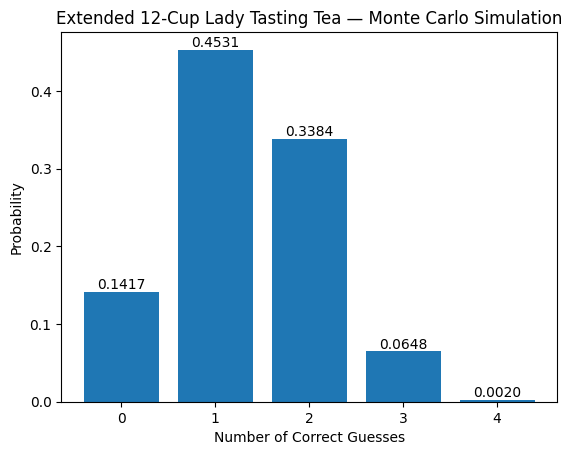

In [17]:
# Create a bar chart of the simulated probabilities
bars = plt.bar(range(len(simulated_probabilities)), simulated_probabilities)

# Label the axes
plt.xlabel("Number of Correct Guesses")
plt.ylabel("Probability")

# Add a title to the plot
plt.title("Extended 12-Cup Lady Tasting Tea — Monte Carlo Simulation")

# Annotate each bar with its probability value (formatted to 4 decimals)
for bar in bars:
    height = bar.get_height()  # Height = probability
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of the bar)
        height,                              # y-position (top of the bar)
        f"{height:.4f}",                      # Text label
        ha="center", va="bottom"              # Center horizontally, place text just above bar
    )

# Display the plot
plt.show()

### 1.5 Comparison of Original vs Extended Experiment

| Experiment | Combinations | P(all correct) |
|-----------|--------------|----------------|
| Fisher 8-cup | 70 | 0.01429 |
| Extended 12-cup | 495 | 0.00202 |

**Interpretation:**

The extended design is **far more stringent**.  
A perfect score is:

- ~7 × less likely under random guessing  
- Therefore, stronger evidence against the null hypothesis

Increasing the number of cups strengthens discrimination between genuine ability and luck.


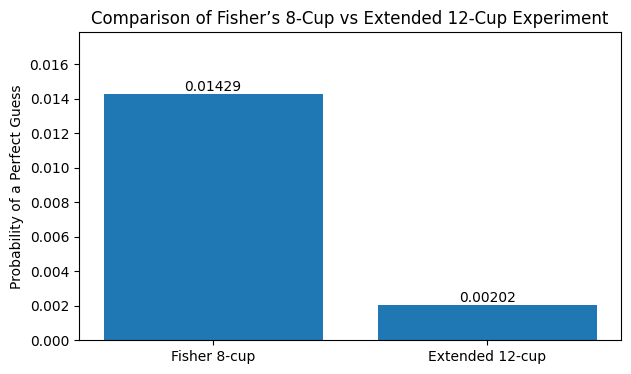

In [18]:
# Data
experiments = ["Fisher 8-cup", "Extended 12-cup"]
probabilities = [prob, prob_ext]

# Create the bar chart
plt.figure(figsize=(7, 4))

# Let Matplotlib assign different colours automatically
bars = plt.bar(experiments, probabilities)

# Labels and title
plt.ylabel("Probability of a Perfect Guess")
plt.title("Comparison of Fisher’s 8-Cup vs Extended 12-Cup Experiment")

# Add numeric probability labels on top of each bar
for bar, probab in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x-position (center of the bar)
        height,                               # y-position (top of the bar)
        f"{probab:.5f}",                         # formatted probability
        ha="center", va="bottom"
    )

# Slightly expand y-axis for visual spacing
plt.ylim(0, max(probabilities) * 1.25)

# Display the chart
plt.show()

### 1.6 "p-value" threshold discussion

Because the 12-cup experiment makes a perfect result under random guessing much less likely (approximately 0.2% compared to 1.4% in the original 8-cup design), it provides stronger evidence against the null hypothesis.

There is therefore no need to relax the conventional significance threshold (e.g., alpha = 0.05), as the probability of a perfect outcome under the null is already far below this level. The extended design can be considered more conservative because it reduces the chance that random guessing produces an extreme result.

As a result, a perfect score in the 12-cup experiment is more compelling than in Fisher’s original test, and extending the experiment strengthens rather than weakens statistical inference.

### 1.7 Conclusion

This investigation combined analytical combinatorics, theoretical probability, and Monte Carlo simulation to extend and explore Fisher’s classic “Lady Tasting Tea” experiment. By increasing the number of cups from 8 to 12, the probability of achieving a perfect result under random guessing drops from \(1/70\) (about 1.4%) to \(1/495\) (about 0.2%). This seven-fold decrease makes the extended design far more stringent and provides stronger evidence against the null hypothesis when a perfect outcome is observed.

The notebook demonstrated how the binomial coefficient formally quantifies the number of possible cup arrangements, and how these analytical results align closely with the probabilities estimated from a large-scale NumPy-based Monte Carlo simulation. The agreement between the theoretical and simulated probabilities reinforces the reliability of both approaches.

Overall, the extended experiment improves the discriminatory power of the test by making random success much less plausible. This highlights how changes in experimental design can strengthen statistical inference, and shows the value of simulation as a tool for validating and deepening understanding of classical statistical results.

## Problem 2: Normal Distribution

In this problem, we create 100,000 small samples of size 10 from the standard normal distribution and, for each one, we calculate two versions of standard deviation: the population version (ddof = 0) and the sample version (ddof = 1). We use NumPy to generate the random numbers and to compute both types of standard deviation.

To compare the results, we plot both sets of values on the same histogram with transparency using Matplotlib, which makes it easier to see how the two estimators behave side-by-side. Finally, we describe the differences we observe and discuss how these differences would change with a larger sample size, especially in terms of how close the estimates get to the true value.

### 2.1 Generating the Samples

The standard normal distribution is a special case of the normal distribution with mean μ = 0 and standard deviation σ = 1. It is defined by the probability density function:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} 
e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

This formula defines:
- μ: the mean of the distribution
- σ: the standard deviation
- A symmetric bell-shaped curve centered at μ

Source: [Standard Normal Distribution from Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution).

To simulate observations from this distribution, we use numpy.random.normal(), which generates random numbers drawn from a Gaussian distribution. Documentation on [numpy.random.normal](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html#rf578abb8fba2-2) was consulted. Its parameters:
- loc → mean μ
- scale → standard deviation σ
- size → shape of the output array

Because the standard normal has μ = 0 and σ = 1, we can rely on NumPy’s default values (loc=0.0, scale=1.0).

We set size = (100000, 10). This creates 100,000 independent samples, each containing 10 observations from the standard normal distribution. In orther words, think of it as 100,000 little groups and each of those groups has 10 numbers inside it.

We use np.random.seed() to ensure the results are identical every time the notebook is run. See documentation on function [numpy.random.seed()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) used here.

In [19]:
# Reproducibility
np.random.seed(123)

# Generate a random normal distribution of 100,000 samples, each of size 10
samples = np.random.normal(size=(100000, 10))

# show
samples


array([[-1.0856306 ,  0.99734545,  0.2829785 , ..., -0.42891263,
         1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897,  1.49138963, ...,  2.18678609,
         1.0040539 ,  0.3861864 ],
       [ 0.73736858,  1.49073203, -0.93583387, ..., -1.4286807 ,
        -0.14006872, -0.8617549 ],
       ...,
       [ 0.17762368,  0.96536248,  0.62452249, ..., -1.7925049 ,
         0.48963897,  0.09439754],
       [-1.40901101,  1.10358968, -0.02636738, ..., -2.62869442,
         1.43692647,  1.60489988],
       [ 1.31148997, -0.00724761, -0.89857677, ..., -0.84768045,
        -0.73819061, -1.29277267]])

### 2.2 Computing Standard Deviations for Each Sample

Standard deviation is a numerical measure that quantifies how far individual observations typically deviate from the mean of a dataset. The formal definition of standard deviation can be expressed differently depending on whether we are working with a full population or a sample.
(Source consulted: Wikipedia [Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation))

#### 2.2.1 Population vs. Sample Standard Deviation


Statistically, we distinguish between two contexts:   

(A) Population Standard Deviation.  

If we have every value in an entire population (no uncertainty, no missing data), the standard deviation is defined as:


$$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

Here:

* the greek letter $\sigma$ is the standard deviation of the population
* $\mu$ is the true population mean
* N is the population size

Because the true mean is known, this formula relies on complete information and measures the exact variability of the population.  
However, this formula underestimates variability when applied to a sample, because samples generally do not contain the full information about the population.

(B) Sample Standard Deviation.

In most practical settings, we work with a sample drawn from a larger population. Since the true population mean $(μ)$ is unknown, we estimate it using the sample mean $(\bar{x})$.
Estimating the mean introduces systematic bias in the variability estimate, so the denominator is adjusted to $N−1$:

$$
s = \sqrt{\frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

This adjustment is called [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction), and it makes the sample standard deviation an unbiased estimator of the population standard deviation.   

Note that the sample standard deviation is represented by the letter $(s)$. 

#### 2.2.2 Standard Deviation in NumPy

In NumPy, the function numpy.std() is used to compute the standard deviation.   
A brief description of the most relevant arguments of numpy.std(a, axis, ddof) is detailed below and was retrieved from [NumPy Documentation on function sdt()](https://numpy.org/doc/stable/reference/generated/numpy.std.html):
- `a`: an array-like object containing the data
- `axis`: specifies whether to compute the statistic across rows, columns, or the entire array
- `ddof`: controls the denominator of the standard deviation formula

In numpy the key difference between population standard deviation and sample standard deviation lies in what denominator we use.

NumPy implements the following formula for standard deviation:

$$
\text{SD} = \sqrt{\frac{1}{N - \text{ddof}}
\sum_{i=1}^{N} (a_i - \bar{a})^2 }
$$

Note that:
- `ddof` stands for Delta Degree of Freedom
- we use `SD` to represent standard deviation for the population $(\sigma)$ or sample $(s)$.
- we also use $\bar{a}$ to represent the mean for the population $(\mu)$ or sample $(\bar{x})$.

See the values for `ddof` and their representation:

* `ddof = 0` → denominator = ( N ) → **population SD**
* `ddof = 1` → denominator = ( N - 1 ) → **sample SD**

In other words:

| Purpose                                  | Correct `ddof` | Formula                                         |
| ---------------------------------------- | -------------- | ----------------------------------------------- |
| **Population standard deviation**        | `ddof=0`       | $\sqrt{\frac{1}{N}} \sum_{i=1}^{N} (x_i - \bar{x})^2$    |
| **Sample standard deviation (unbiased)** | `ddof=1`       | $\sqrt{\frac{1}{N-1}} \sum_{i=1}^{N} (x_i - \bar{x})^2$  |

#### 2.2.3 Population Standard Deviation (ddof = 0)

Let's compute NumPy Population Standard Deviation:


$$\sigma = \sqrt{\frac{1}{N - \text{(0)}} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

In [20]:
# Population SD (biased estimator)
sd_population = np.std(samples, axis=1, ddof=0)

# Show
sd_population

array([1.2363048 , 1.08673631, 1.02663711, ..., 0.73735415, 1.27480498,
       1.03174138])

NumPy is taking each of the 100,000 small groups of 10 in samples and calculating how spread out the numbers are inside each group. Because axis=1 is used, the standard deviation is computed row by row, giving one value per group. The output is therefore a long list of 100,000 standard deviation values, one for each group of 10 numbers.
Here, NumPy uses the population formula, which divides by the full number of values in each group. This tends to produce slightly smaller values, because it does not adjust for the fact that we are working with samples rather than the whole population. As a result, this version often underestimates the true amount of variation in the data.

#### 2.2.4 Sample Standard Deviation (ddof = 1)

Let's compute NumPy Sample Standard Deviation:

$$
s = \sqrt{\frac{1}{N - \text{(1)}} \sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

In [21]:
# Sample SD (unbiased estimator)
sd_sample = np.std(samples, axis=1, ddof=1)

# Show
sd_sample

array([1.30317968, 1.14552066, 1.08217053, ..., 0.77723952, 1.34376243,
       1.0875509 ])

In the same way as done before for the population standard deviation, NumPy looks at each group of 10 numbers in samples and measures how spread out they are. Using axis=1 makes it calculate this for each row separately, so the result is 100,000 standard deviation values-one for each group.
However, differently from the population standard deviation, NumPy uses the sample formula, which divides by one less than the number of values in each group. This makes each result slightly larger on average, because it adjusts for the uncertainty that comes from estimating the mean from only 10 numbers. This version gives a more accurate estimate of variation when we only have samples.

### 2.3 Visualisation Using Overlapping Histograms

In this section we create a plot that compares how two different formulas for standard deviation behave when we repeatedly take samples. It draws two histograms on the same figure: one for the standard deviation calculated with ddof=0 (the population formula) and one with ddof=1 (the sample formula). By plotting them together, we can see how often different values of the standard deviation show up across many repeated samples.  

Both histograms are normalized so they show densities, which means the shape reflects how the estimates are spread out, not how many values there are. The transparency allows the two shapes to overlap, so we can visually compare them more easily. Labels, a title, a legend, and a grid are added to make the plot clear and readable.    

Overall, this visualization gives us a quick way to see the difference between the two estimators: how they vary, how spread out they are, and whether one tends to produce slightly smaller or larger values than the other when sample size is small.

The main functions used here come from Matplotlib, which is a Python library for plotting graphs. [Matplotlib documentation](https://matplotlib.org/stable/api/pyplot_summary.html) was used to create the plot below. The function plt.figure() sets up the plotting area, and plt.hist() is used to draw histograms of the two sets of standard deviation values. The density=True option makes the histograms show probability densities rather than raw counts, and the alpha parameter controls transparency so they can overlap without hiding each other. Finally, functions like plt.title(), plt.xlabel(), plt.ylabel(), plt.legend(), and plt.grid() are simply for formatting the graph so it’s easier to read.

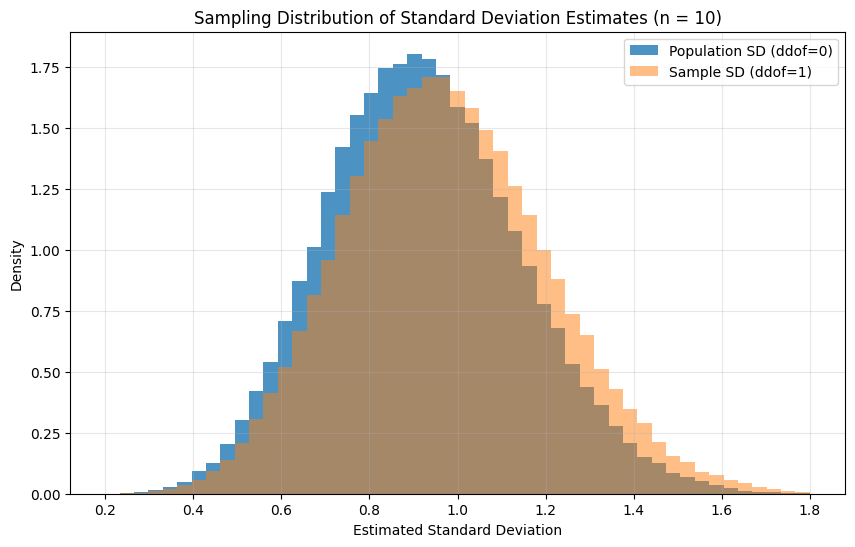

In [22]:
# Plotting both distributions
plt.figure(figsize=(10,6))

# Creating overlapping histograms
plt.hist(sd_population, bins=np.linspace(0.2, 1.8, 50), alpha=0.8, density=True, label='Population SD (ddof=0)')
plt.hist(sd_sample, bins=np.linspace(0.2, 1.8, 50), alpha=0.5, density=True, label='Sample SD (ddof=1)')

# Labels and title
plt.title("Sampling Distribution of Standard Deviation Estimates (n = 10)")
plt.xlabel("Estimated Standard Deviation")
plt.ylabel("Density")
# Legend and Grid
plt.legend()
plt.grid(alpha=0.3)
# Display the plot
plt.show()


### 2.4 Interpretation of the Histograms

The two histograms show that both estimators produce smooth, slightly right-skewed distributions. This shape is expected because standard deviation values cannot be negative and are based on squared deviations, which naturally create a right-tailed spread even when the underlying data are normally distributed.

The main difference is that the ddof = 0 distribution (population standard deviation) is centred lower than the ddof = 1 distribution (sample standard deviation). This reflects how the population formula systematically underestimates variability when applied to small samples. In contrast, the ddof = 1 estimator uses Bessel’s correction, which adjusts for the information lost when using the sample mean instead of the population mean. As a result, its distribution sits closer to the true value of 1, providing a less biased estimate for sample-based inference.

### 2.5 Effect of Increasing Sample Size

If the sample size were increased, both distributions would become narrower and more concentrated around the true population standard deviation. Larger samples reduce the influence of random fluctuations, producing more stable and less variable estimates. In addition, the difference between the ddof = 0 and ddof = 1 estimators would diminish as sample size grows, because the corrective factor used in the ddof = 1 formula approaches 1 for large n. Consequently, both estimators converge toward the same value and become nearly indistinguishable. This reflects the general principle that estimator accuracy improves with larger samples, and bias becomes negligible as more information about the population is incorporated into each sample.

### 2.6 Conclusion

In this exercise, we generated many small samples from the standard normal distribution and used NumPy to compute both the population and sample standard deviation for each one. By plotting them with Matplotlib, we saw that the population SD (ddof=0) tends to be lower because it underestimates variability, while the sample SD (ddof=1) is slightly higher and gives a more accurate estimate.

The histograms showed clear differences between the two estimators when sample size is small. However, if we increased the sample size, both results would become more concentrated around the true value and the difference between them would become much smaller.

Overall, the simulation and plots helped visualize how sample size affects bias and accuracy in standard deviation estimates.

## Problem 3: t-Tests

In hypothesis testing, a Type II error occurs when a statistical test fails to reject the null hypothesis even though it is false. This is a concept formalized in the classical framework of Neyman and Pearson. The probability of committing such an error, denoted by the greek letter betta $(β)$, is directly related to the power of a test ($1 − β$), which measures its ability to detect true effects. Understanding how $β$ behaves under different conditions is crucial for assessing the sensitivity and reliability of statistical procedures.

In this analysis, Type II error is examined in independent samples t-test, which assesses whether the means of two independent populations differ significantly. We consider a simulation-based setting in which one sample is drawn from a standard normal distribution N(0,1), while the second is drawn from N($d$,1), where $d$ represents the true mean difference. Varying $d$ introduces increasing separation between the populations and allows assessment of the test’s ability to detect these differences.

For each value of $d$ ranging from 0 to 1 in increments of 0.1, we repeatedly simulate two samples of size 100, perform an independent samples t-test at the 5% significance level, and record the proportion of times the test fails to reject the null hypothesis. Repeating this process 1,000 times per value of $d$ enables us to estimate how the Type II error rate changes across increasing mean differences.

By examining these proportions as a function of $d$, we gain insight into how effect size influences statistical power and the likelihood of failing to detect true differences. The articles on the [Neyman–Pearson lemma](https://en.wikipedia.org/wiki/Neyman–Pearson_lemma), [Type I and type II errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) and [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) from Wikipedia were consulted to clarify the formal definitions of t-test and Type II error.

### 3.1 Setting Up the Simulation Parameters

Before running the simulation, we first define all the key parameters that control how the experiment will behave. To start, we set a random seed using np.random.seed(42), used here in the same way as in Problem 1, where its purpose and documentation were already explained.

In [23]:
# For reproducibility
np.random.seed(42)

We then specify the significance level (alpha = 0.05), which determines the threshold for rejecting the null hypothesis during the t-tests. The sample size for each group is set to n = 100, and we decide to repeat each simulation n_simul = 1000 times so that our estimate of the Type II error rate is stable and not influenced by random variation.

In [24]:
# Parameters
alpha = 0.05                # Significance level
n = 100                     # Sample size per group
n_simul = 1000              # Number of simulations for each d

Finally, we define d_values using the NumPy function *np.arange*, which generates evenly spaced numerical values over a specified interval. In this case, it creates a sequence of mean differences ranging from 0 to 1 in steps of 0.1. These values represent the true effect sizes we intend to explore in our study. 

The np.arange function produces this sequence by starting at the lower bound, repeatedly adding the step size (0.1), and continuing until it reaches the upper limit, which is not inclusive.

According to the NumPy documentation, *np.arange* is used “to return evenly spaced values within a given interval,” making it suitable for defining structured numerical ranges such as our effect-size grid. NumPy Documentation reviewed: [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

In [25]:
# Mean differences: 0, 0.1, 0.2, ..., 1.0
d_values = np.arange(0, 1.01, 0.1)

# Show d_values
d_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### 3.2 Creating a Function to Estimate the Type II Error

The next step is to write a function that will estimate the Type II error rate for a specific value of $d$. This function performs the main statistical work of the experiment by repeatedly generating data, applying a hypothesis test, and recording how often the null hypothesis is not rejected.

For each simulation, the function draws two independent samples using Numpy function *random.normal*:
- sample1 - from a standard normal distribution, where mean (loc) = 0 and standard deviation (scale) = 1.
- sample2 - from a normal distributio, where mean = d and standard deviation = 1.   

After generating the samples, the function applies an independent samples t-test using *stats.ttest_ind* from the SciPy library to check whether the sample means differ significantly. This function implements the t-test, which compares the difference between the two sample means relative to the variability within the samples. In this implementation, the test is two-sided by default and assumes equal variances in both groups (equal_var=True). The function returns a test statistic and an associated p-value; only the p-value is used here to determine whether the null hypothesis of equal means should be rejected at the chosen significance level.

Finally, if the resulting p-value is greater than or equal to alpha, we count this as a failure to reject the null hypothesis (no_reject_count) and after looping for all 1000 simulations we output the count of failures divided by the 1000 simulations.

To create te estimate_type2_for_d function the use of random.normal was revisited as per reference in Problem 2 and the use of stats.ttest_ind was derived from Scipy documentation: [T-test for Independent Samples](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).


In [26]:
# Function to estimate Type II error for a given mean difference d
def estimate_type2_for_d(d, n_simul, n, alpha):
    """
    Estimate the proportion of times the null hypothesis is NOT rejected
    when comparing N(0, 1) vs N(d, 1) with an independent t-test.
    """
    no_reject_count = 0
    
    for i in range(n_simul):
        # Sample 1: N(0, 1)
        sample1 = np.random.normal(loc=0, scale=1, size=n)
        # Sample 2: N(d, 1)
        sample2 = np.random.normal(loc=d, scale=1, size=n)
        
        # Two-sided t-test
        _, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)
        
        # Fail to reject H0 if p >= alpha
        if p_value >= alpha:
            no_reject_count += 1
    
    # Proportion of times we did NOT reject H0
    return no_reject_count / n_simul


This code applies the simulation function to each value of $d$ in $d_values$ and stores the resulting proportions of non-rejection in the list *proportions_no_reject*, one value per mean difference, for further analysis.

In [29]:
# Store the proportions of no rejection for each d
proportions_no_reject = []

# Loop over each mean difference d
for d in d_values:
    prop = estimate_type2_for_d(d, n_simul=n_simul, n=n, alpha=alpha) # Call the function and pass parameters
    proportions_no_reject.append(prop) # Append the result to the list

# Display the results
proportions_no_reject


[0.946, 0.895, 0.737, 0.475, 0.181, 0.056, 0.012, 0.001, 0.0, 0.0, 0.0]

### 3.4 Plotting the Estimated Type II Error Rates

The final step is to visualize the results. Using Matplotlib, we create a plot showing the estimated Type II error rate for each value of $d$. The horizontal axis represents the true mean difference, and the vertical axis shows how often the null hypothesis was not rejected in our simulations. This kind of plot helps us see patterns that may not be obvious from the raw numbers alone. Specifically, it reveals how the probability of missing a real difference changes as the true mean difference increases. 

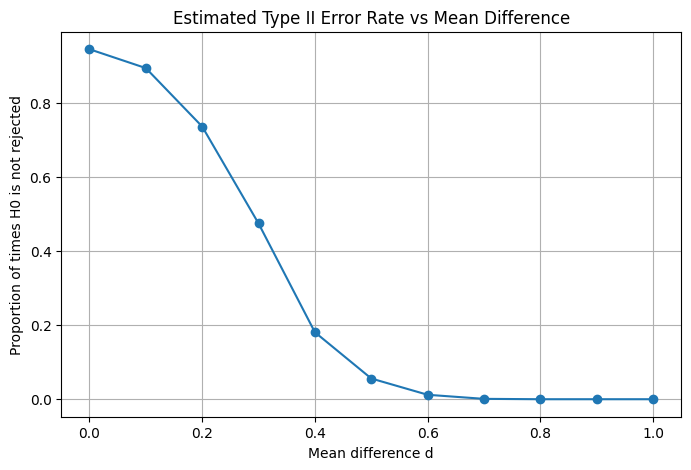

In [30]:
# Create a new figure for the plot
plt.figure(figsize=(8, 5))

# Plot the Type II error estimates against mean differences
plt.plot(d_values, proportions_no_reject, marker="o") 

# Label the x-axis and y-axis
plt.xlabel("Mean difference d")
plt.ylabel("Proportion of times H0 is not rejected")

#Add title and grid
plt.title("Estimated Type II Error Rate vs Mean Difference")
plt.grid(True)

# Display the plot
plt.show()


### 3.5 Effect of Mean Difference on Type II error Rate

As the mean difference $d$ increases, the Type II error rate steadily decreases. When $d$ is small, the two distributions overlap considerably, so the t-test has limited ability to distinguish between them and often fails to reject the null hypothesis. As $d$ grows, the separation between the distributions becomes more pronounced relative to their variability, making true differences easier to detect. As a result, the t-test rejects the null hypothesis more consistently, and the probability of a Type II error drops, reflecting an increase in statistical power.

### 3.6 Conclusion

This analysis used a simulation-based approach to examine how the Type II error rate behaves in an independent samples t-test as the true difference in means increases. By repeatedly sampling from normal distributions with controlled mean differences and applying a t-test at a fixed significance level, we were able to empirically estimate the probability of failing to reject a false null hypothesis across a range of effect sizes.

The results show that when the mean difference is small, the overlap between the two distributions is substantial, leading to a high Type II error rate. As the mean difference increases, the separation between the distributions becomes more pronounced, allowing the t-test to detect differences more reliably. Consequently, the Type II error rate decreases and statistical power increases. This demonstrates the strong dependence of hypothesis test performance on effect size and highlights the importance of considering power when designing and interpreting statistical tests.

Overall, the simulation reinforces the theoretical relationship between effect size, Type II error, and statistical power within the Neyman–Pearson framework, while providing a practical illustration of these concepts using the independent samples t-test.

## Problem 4: ANOVA

This problem investigates the comparison of population means across multiple groups using a simulation-based framework. Three independent samples, each of size n=30, are generated from normal distributions with a common standard deviation of 1 but with distinct population means of 0, 0.5, and 1. The controlled structure of the data allows for a clear examination of how different statistical procedures respond to increasing separation between group means under standard model assumptions.

The analysis applies a one-way analysis of variance (ANOVA) to test the global null hypothesis that all population means are equal. In parallel, independent two-sample t-tests are performed for each pair of groups in order to assess mean differences on a pairwise basis. By presenting both approaches side by side, the analysis sets the stage for exploring how global and pairwise inference address the same underlying question in different ways, and examines how issues such as error control and interpretability emerge when multiple comparisons are involved.

### 4.1 Setup  

A fixed random seed is used to ensure that the results are reproducible, in the same manner as in Problems 1 - 3.

In [53]:
# Reproducibility
np.random.seed(42)

We define the size of the samples ($n=30$) and standard deviation σ=1.

In [54]:
# Sample size
n = 30
# Standard deviation
sigma = 1.0

We generate three independent samples from normal distributions means:

Group 1: μ1=0    
Group 2: μ2=0.5    
Group 3: μ3=1  

The samples are generated independently, meaning that observations in one group do not influence observations in another group. This independence assumption is fundamental for both ANOVA and two-sample t-tests. To complete this step we use the function random.normal which has been used previously in Problems 2 and 3.

In [55]:
# Generate three independent samples
x1 = np.random.normal(loc=0.0, scale=sigma, size=n)    # mean 0.0
x2 = np.random.normal(loc=0.5, scale=sigma, size=n)    # mean 0.5
x3 = np.random.normal(loc=1.0, scale=sigma, size=n)    # mean 1.0

Then, we compute basic descriptive statistics for each of the three simulated samples before any formal hypothesis testing is performed. For each group, it calculates the sample mean and sample standard deviation, providing a quick numerical summary of the data.

The enumerate() function is used to loop over the three samples while assigning readable group labels starting from 1, similarly as used in Problem 1. The mean is computed using np.mean(), and the standard deviation is calculated with np.std(ddof=1), which applies Bessel’s correction to obtain an unbiased sample standard deviation.

Printing these values allows us to verify that the simulated samples behave as expected: the means should be close to their specified population values (0, 0.5, and 1), and the standard deviations should be close to 1.

For the NumPy function *np.mean()* used here, the official documentation was consulted on [numpy.mean](https://numpy.org/devdocs/reference/generated/numpy.mean.html). The function *np.std* and Bessel's correction had been applied in Problem 2, and that understanding was carried forward to this step.

In [56]:
# Display basic descriptive statistics
for i, x in enumerate([x1, x2, x3], start=1):
    print(f"Group {i}: mean = {np.mean(x):.4f}, std = {np.std(x, ddof=1):.4f}")         

Group 1: mean = -0.1881, std = 0.9000
Group 2: mean = 0.3788, std = 0.9311
Group 3: mean = 1.0129, std = 0.9920


### 4.2 One-way Analysis of Variance (ANOVA )

Analysis of Variance (ANOVA) is a classical statistical methodology introduced by Fisher for testing whether two or more population means differ within a single inferential framework. Rather than comparing means pairwise, ANOVA evaluates whether the variability observed between group means is large relative to the variability observed within groups. This comparison is quantified through the $F$ statistic, which follows an $F$ distribution under the null hypothesis that all population means are equal.

The $F$ statistic is constructed as the ratio of:

- *Between-group variability*: how far group means are from the overall mean.
- *Within-group variability*: how spread out observations are within each group.

$$F = \frac{\text{Between-group variance}}{\text{Within-group variance}}$$


Large values of F indicate that differences among group means are large relative to random variation within groups, providing evidence against the null hypothesis.

In this analysis, one-way ANOVA is used to test the global hypothesis:

$$H_0:μ_1=μ_2=μ_3$$

By aggregating evidence across all groups into one test, one-way ANOVA provides a coherent approach to evaluating mean differences while maintaining control over the Type I error rate when multiple groups are involved. Wikipedia article on [Analysis of Variance](https://en.wikipedia.org/wiki/Analysis_of_variance) was consulted to support the theoretical background of this analysis.

The function scipy.stats.f_oneway() is used to perform a one-way Analysis of Variance (ANOVA) test. It takes as input two or more independent sample arrays and tests the null hypothesis that all population means are equal. Internally, the function computes the ANOVA $F$ statistic by comparing between-group variability to within-group variability and returns both the F statistic and the associated p-value.

In this analysis, f_oneway(x1, x2, x3) is applied to the three simulated samples in order to evaluate whether the observed differences among their sample means are statistically significant under the assumption of independent observations and equal variances. The Scipy Stats Documentation on [f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html?utm_source=chatgpt.com) was considered to compute the One-way ANOVA.

In [57]:
# One-way ANOVA
anova_result = stats.f_oneway(x1, x2, x3)

# Display the ANOVA results
anova_result

F_onewayResult(statistic=12.209525517972807, pvalue=2.1200748140507065e-05)

The ANOVA test produced a very small p-value ($2.12 \times 10^{-5}$), which is well below the usual significance level of 0.05. This means that the observed differences between the group averages are very unlikely to be due to random chance alone.

Therefore, we conclude that not all three group means are equal. At least one group differs from the others.

### 4.3 Parwise Independent Two-Sample T-test

An independent two-sample t-test evaluates whether the means of two independent populations differ:

$$H0:μa=μb$$

$$H1:μa≠μb$$

Independ two-sample t-test was previously used in Problem 3. You can review that section for more details.

Here, we perform three pairwise comparisons:

- Group 1 vs Group 2

- Group 1 vs Group 3

- Group 2 vs Group 3

Each test is conducted at significance level α=0.05.

To complete this step we are going to use the function ttest_ind() from Scipy Stats which was also introduced in Problem 3. Here again we will use the argument `equal_var=True` as it assumes equal variances, which is reasonable here because all samples were generated with the same standard deviation.

In [58]:
# Pairwise independent two-sample t-tests

# Group 1 vs Group 2
t_stat_1_2, p_value_1_2 = stats.ttest_ind(x1, x2)

# Group 1 vs Group 3
t_stat_1_3, p_value_1_3 = stats.ttest_ind(x1, x3)

# Group 2 vs Group 3
t_stat_2_3, p_value_2_3 = stats.ttest_ind(x2, x3)

# Display the pairwise t-test results
print("Pairwise t-test results:")
print(f"Group 1 vs Group 2: t = {t_stat_1_2:.4f}, p = {p_value_1_2:.6f}")
print(f"Group 1 vs Group 3: t = {t_stat_1_3:.4f}, p = {p_value_1_3:.6f}")
print(f"Group 2 vs Group 3: t = {t_stat_2_3:.4f}, p = {p_value_2_3:.6f}")


Pairwise t-test results:
Group 1 vs Group 2: t = -2.3981, p = 0.019718
Group 1 vs Group 3: t = -4.9113, p = 0.000008
Group 2 vs Group 3: t = -2.5526, p = 0.013347


At the 5% significance level ($α=0.05$), all three pairwise comparisons are statistically significant, since each p-value is below 0.05. This indicates that the mean of each group differs significantly from the mean of the group it is compared with.

In practical terms:

- Group 1 and Group 2 have significantly different means.

- Group 1 and Group 3 have a very strong difference in means.

- Group 2 and Group 3 also have significantly different means.

### 4.4 Comparison of ANOVA and t-Test Conclusions

The descriptive statistics already suggest increasing group means, with sample means of approximately −0.188, 0.379, and 1.013, and similar spreads (sample standard deviations close to 1). This matches the way the data were generated: 
N(0,1), N(0.5,1) and N(1,1).

The one-way ANOVA returns $F≈12.21$ with $p≈2.12 \times 10^{-5}$. At $α=0.05$, this leads to rejecting the null hypothesis that all three population means are equal. In other words, ANOVA concludes that there is evidence of a difference somewhere among the three group means, but it does not specify where.

The pairwise two-sample t-tests provide that detail. At $α=0.05$, all three comparisons are significant:

Group 1 vs Group 2: p=0.0197
Group 1 vs Group 3: p=0.000008
Group 2 vs Group 3: p=0.0133

Therefore, the t-tests suggest that each pair of groups differs, with the strongest evidence for a difference between Group 1 and Group 3 (smallest p-value).

Overall, the conclusions are consistent: ANOVA detects an overall difference, and the t-tests show that the difference occurs in all pairwise comparisons for this particular simulated dataset.

### 4.5 Why ANOVA Is Preferred Over Running Several t-Tests

When comparing more than two groups, one-way ANOVA is generally preferred over performing multiple pairwise t-tests because it provides a single global test addressing whether any differences exist among the group means. By evaluating all groups simultaneously, ANOVA avoids the inflation of Type I error that occurs when several t-tests are conducted independently.

Running multiple t-tests increases the probability of committing at least one Type I error (false positive), a phenomenon known as the multiple comparisons problem, which is quantified by the family-wise error rate. This was derived from reviewing the article on [Multiple Comparison Problem](https://en.wikipedia.org/wiki/Multiple_comparisons_problem) in Wikipedia.
Although corrections such as the [Bonferroni adjustment](https://en.wikipedia.org/wiki/Bonferroni_correction) can be applied to control this error, ANOVA addresses the issue at the outset by maintaining the nominal significance level within a single hypothesis test.

A limitation of ANOVA is that it does not identify which specific group means differ. For this reason, pairwise t-tests are typically used as post-hoc analyses following a significant ANOVA result, allowing specific differences to be examined while preserving overall statistical validity.

### 4.6 Conclusion

In this problem, three independent samples were generated from normal distributions with equal variance but increasing means, allowing a controlled comparison of statistical methods for assessing differences across multiple groups. The simulated data produced sample means that closely reflected the underlying population structure, providing a suitable basis for inference.

The one-way ANOVA yielded a highly significant result, leading to rejection of the null hypothesis that all three population means are equal. This established that a systematic difference exists among the groups. The subsequent pairwise two-sample t-tests confirmed this finding by showing that each pair of groups differs significantly, with the strongest evidence observed between the groups with the most widely separated means.

Together, these results illustrate how ANOVA and t-tests address the same question at different levels. ANOVA provides an efficient global assessment of mean differences while controlling Type I error, and pairwise t-tests supply additional detail once overall differences have been detected. This reinforces the standard analytical approach of using ANOVA as an initial test, followed by targeted comparisons when appropriate.

# Overall Conclusion

This assessment uses a combination of mathematical reasoning, simulation, and hypothesis testing to explore core ideas in applied statistics. Across the four problems, statistical concepts are examined both theoretically and through computational experiments, helping to show how they behave in practice.

In Problem 1, Fisher’s Lady Tasting Tea experiment was extended to examine how experimental design affects statistical evidence. Increasing the number of cups greatly reduced the chance of a perfect result occurring by random guessing. Both combinatorial calculations and Monte Carlo simulation produced consistent probability estimates, showing good agreement between theory and simulation and demonstrating how stronger designs lead to more convincing conclusions.

Problem 2 investigated sampling variability in the normal distribution by comparing population and sample standard deviation estimators. The results showed that the population standard deviation (ddof = 0) tends to underestimate variability for small samples, while the sample standard deviation (ddof = 1) corrects for this bias. The visualisation highlighted how these differences decrease as sample size increases.

In Problem 3, simulation was used to study Type II error in independent-samples t-tests. As the true difference in means increased, the probability of failing to detect a real effect decreased, illustrating how statistical power improves with larger effect sizes and reduced overlap between distributions.

Finally, Problem 4 compared one-way ANOVA with multiple pairwise t-tests when analysing three groups. While both approaches identified differences, ANOVA provided a single overall test and avoided the increased risk of Type I error associated with multiple comparisons.

Overall, the assessment shows how simulation, visualisation, and formal hypothesis testing complement each other and how computational tools can support clearer understanding and sound statistical reasoning.

***
# End